Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Load the dataset

In [2]:
url = "data.csv"
data = pd.read_csv(url)
print("Data imported successfully")
print(data.head(15))

Data imported successfully
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17


Explore and visualize the data

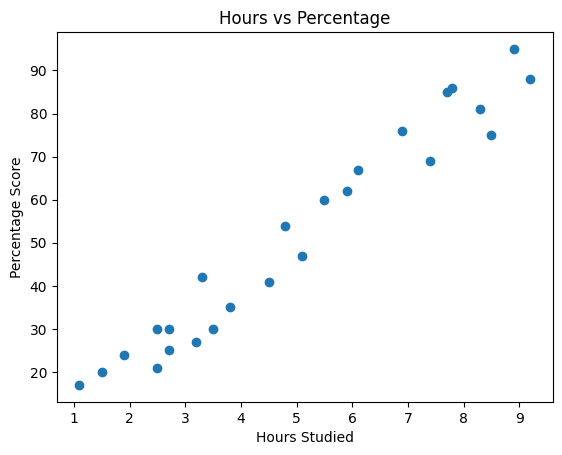

In [3]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Prepare the data for training

In [18]:
X = data['Hours']
y = data['Scores']

Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the linear regression model

In [20]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)

print("Training complete.")

Training complete.


Plotting the Regreesion line

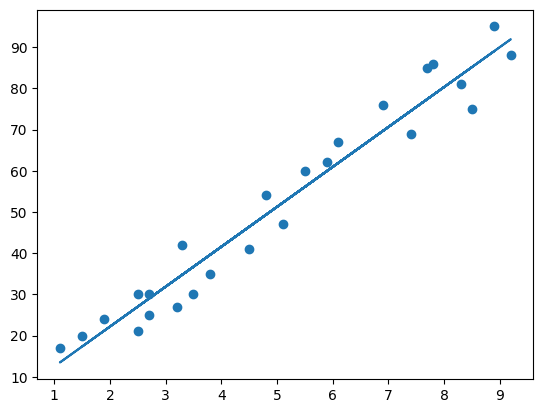

In [28]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

Make predictions

In [23]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))
print(X_test)

8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
Name: Hours, dtype: float64


 Compare actual vs predicted

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


Predicting the score for 9.25 hours of study

In [25]:
new_hours = [[9.25]]
predicted_score = regressor.predict(new_hours)
print("Predicted Score for", new_hours[0][0], "hours:", predicted_score[0])


Predicted Score for 9.25 hours: 92.38611528261494


Evaluate the model

In [26]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
